#MBA Business Analytics e Big Data
##Modelagem Preditiva Avançada
######Por: Ricardo Reis

######Case - Framingham Heart Study


#### Carrega Pacotes

In [0]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
import keras
print("keras version:", keras.__version__)

import tensorflow as tf
print("tensorflow version:", tf.__version__)

print("GPU support:", tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))

Using TensorFlow backend.


keras version: 2.3.1
tensorflow version: 2.2.0-rc3
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU support: False


In [0]:
from keras import models, layers

####Leitura de Dados

In [0]:
df = pd.read_csv('/content/framingham.csv', sep = ',' )

In [0]:
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Data Prep

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [0]:
#Checa Valores Nulos
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [0]:
#checa proporção da variável resposta
df['TenYearCHD'].value_counts(normalize=True) * 100

0    84.811321
1    15.188679
Name: TenYearCHD, dtype: float64

In [0]:
#Estratégia Adotada:
#Excluindo linhas com Missing Values
df = df.dropna()

print("Proporção da Variável Resposta", "\n", df['TenYearCHD'].value_counts(normalize=True) * 100, "\n\n")
print("Checa Valores Nulos", "\n", df.isna().sum())

Proporção da Variável Resposta 
 0    84.7731
1    15.2269
Name: TenYearCHD, dtype: float64 


Checa Valores Nulos 
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [0]:
#Separa Features da Variável Resposta
features = df.iloc[:,0:15]
result = df.iloc[:,15]

In [0]:
#Cria Dataframes de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(features, result, test_size = 0.2, random_state = 12345)

In [0]:
#Normalização dos Dados de Treino e Teste
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std

In [0]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
#X_train

####Artificial Neural Networks

In [0]:
model = models.Sequential()

In [0]:
# 1ª Camada
model.add(layers.Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim= 15))
# 2ª Camada Escondida
model.add(layers.Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# Camada de Output
model.add(layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['sparse_categorical_accuracy', 'categorical_accuracy','binary_accuracy', 'accuracy'])

In [0]:
history1 = model.fit(X_train, y_train, validation_split=0.2, batch_size = 10, epochs = 300, verbose = 0)

In [0]:
history_dict = history1.history
history_dict.keys()

dict_keys(['val_loss', 'val_sparse_categorical_accuracy', 'val_categorical_accuracy', 'val_binary_accuracy', 'val_accuracy', 'loss', 'sparse_categorical_accuracy', 'categorical_accuracy', 'binary_accuracy', 'accuracy'])

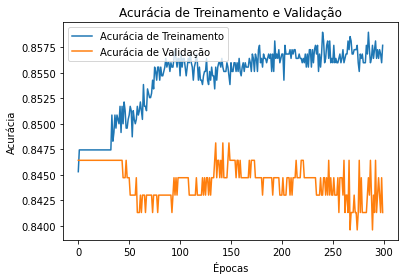

In [0]:
# Plot da Acurácia de Treinamento e Validação
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Acurácia de Treinamento e Validação')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Acurácia de Treinamento', 'Acurácia de Validação'], loc='upper left')
plt.show()

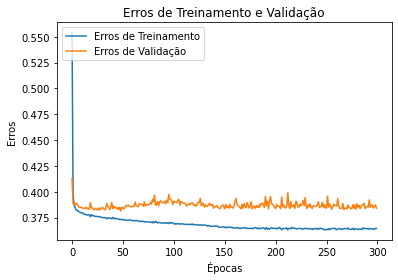

In [0]:
# Plot da Erros de Treinamento e Validação
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Erros de Treinamento e Validação')
plt.ylabel('Erros')
plt.xlabel('Épocas')
plt.legend(['Erros de Treinamento', 'Erros de Validação'], loc='upper left')
plt.show()

In [0]:
train, test = train_test_split(base, test_size=0.3)

In [0]:
train.shape

(2968, 16)

In [0]:
test.shape

(1272, 16)

In [0]:
train_labels = train['TenYearCHD']
test_labels = test['TenYearCHD']

In [0]:
train_data = train.iloc[:, 0:15]
test_data = test.iloc[:, 0:15]

In [0]:
train_data = np.asarray(train_data).astype('float32')
test_data = np.asarray(test_data).astype('float32')

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
train_data.shape

(2968, 15)

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_dim= 15))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense( 1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(train_data,
                    y_train,
                    epochs=20,
                    batch_size=10,
                    validation_split=0.2)

Train on 2374 samples, validate on 594 samples
Epoch 1/20
2374/2374 [==============================] - 0s 172us/step - loss: nan - accuracy: 0.0038 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/20
2374/2374 [==============================] - 0s 132us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/20
2374/2374 [==============================] - 0s 137us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/20
2374/2374 [==============================] - 0s 140us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/20
2374/2374 [==============================] - 0s 136us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/20
2374/2374 [==============================] - 0s 134us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/20
2374/2374 [==============================] - 0s 136us/step